In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.io import fits

mpl.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix',
                            'image.cmap': 'viridis'})

path = '/astro/store/gradscratch/tmp/scw7/tessData/lightcurves/sec7/'

In [2]:
# Take a look at my flare stats
df = pd.read_csv('7_flare_out.csv')
print(str(len(df)) + ' flare detections')

1993 flare detections


Text(0, 0.5, 'Peak/Median Flux')

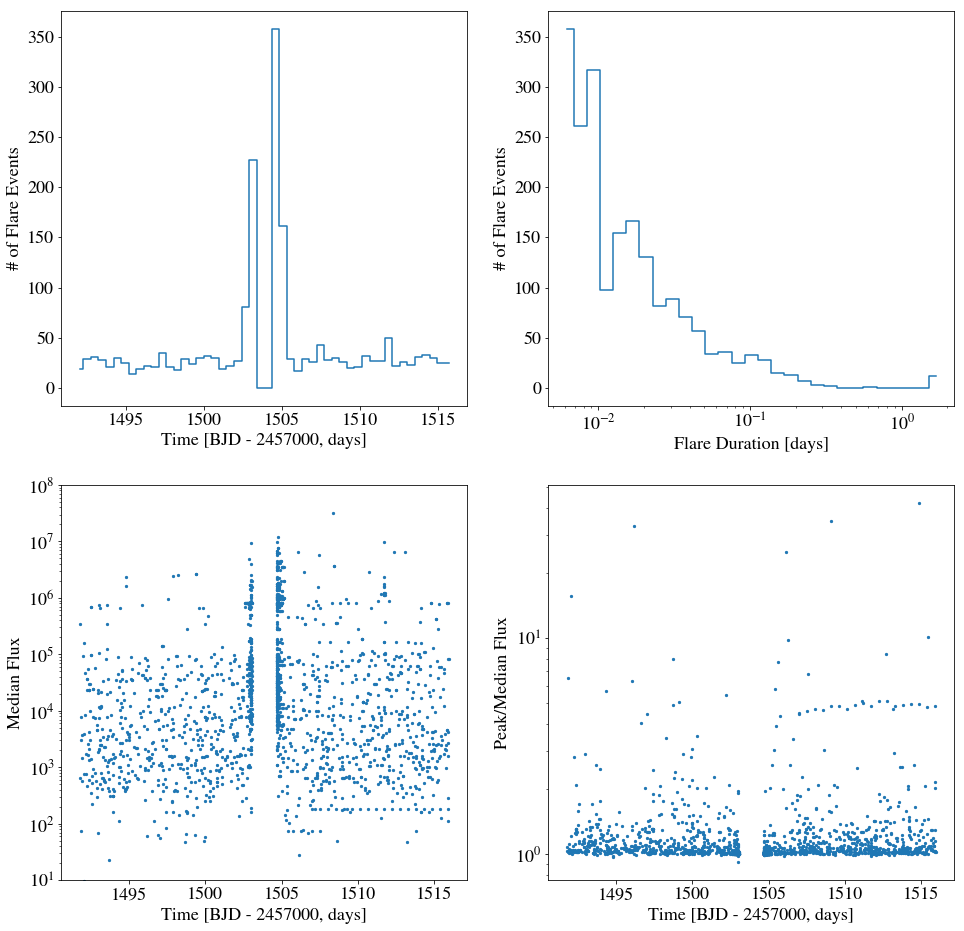

In [24]:
fig, axes = plt.subplots(figsize=(16,16), nrows=2, ncols=2)

hist, bins = np.histogram(df['t0'], bins=50)
bins = 0.5*(bins[1:] + bins[:-1])
axes[0][0].plot(bins, hist, linestyle='steps-mid')
axes[0][0].set_xlabel('Time [BJD - 2457000, days]')
axes[0][0].set_ylabel('# of Flare Events')

duration = df['t1'] - df['t0']
bins = np.logspace(np.log10(np.min(duration)), np.log10(np.max(duration)), num=30)
hist, bins = np.histogram(duration, bins=bins)
bins = 0.5*(bins[1:] + bins[:-1])
axes[0][1].semilogx(bins, hist, linestyle='steps-mid')
axes[0][1].set_xlabel('Flare Duration [days]')
axes[0][1].set_ylabel('# of Flare Events')

bins = 0.5*(bins[1:] + bins[:-1])
axes[1][0].scatter(df['t0'], df['med'], s=5)
axes[1][0].set_yscale('log')
axes[1][0].set_ylim(10, 1e8)
axes[1][0].set_xlabel('Time [BJD - 2457000, days]')
axes[1][0].set_ylabel('Median Flux')

bins = 0.5*(bins[1:] + bins[:-1])
axes[1][1].scatter(df['t0'], df['peak']/df['med'], s=5)
axes[1][1].set_yscale('log')
axes[1][1].set_xlabel('Time [BJD - 2457000, days]')
axes[1][1].set_ylabel('Peak/Median Flux')

In [25]:
# Lots of flare detections around the break in the data
mask = (df['t0'] > 1502.5) & (df['t0'] < 1505)
df[mask]

,Unnamed: 0,TIC,t0,t1,med,peak
0,27.0,452926293,1504.710803,1504.781637,7.911032e+05,7.933664e+05
1,27.0,452926293,1504.789970,1504.803859,7.911032e+05,7.933166e+05
2,27.0,452926293,1504.821915,1504.827470,7.911032e+05,7.929528e+05
12,63.0,19941715,1504.710270,1504.835273,9.912838e+05,9.955219e+05
13,88.0,59764377,1503.037083,1504.731529,8.609863e+04,8.644869e+04
14,88.0,59764377,1504.734307,1504.744029,8.609863e+04,8.639327e+04
24,217.0,349275562,1504.705811,1504.736367,3.507817e+04,3.519540e+04
33,270.0,130572079,1504.707858,1504.725914,1.794758e+04,1.828251e+04
34,270.0,130572079,1504.728692,1504.735636,1.794758e+04,1.827990e+04
35,270.0,130572079,1504.738414,1504.763414,1.794758e+04,1.829725e+04


tess2019006130736-s0007-0000000452926293-0131-s_lc.fits


/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater_equal
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less_equal


Text(0, 0.5, 'Flux [e-/s]')

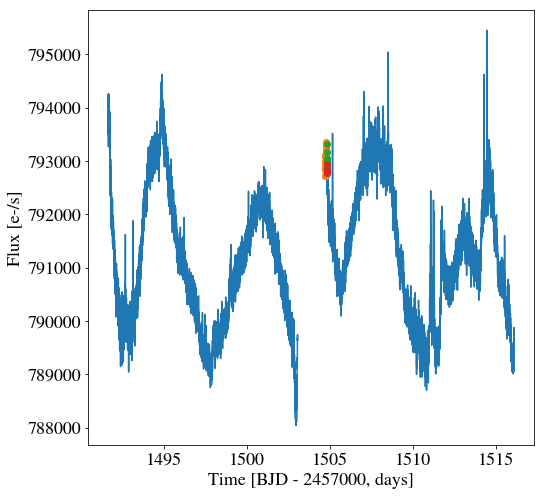

In [26]:
TIC = df[mask].iloc[0]['TIC']
TIC_str = str(int(TIC)).zfill(16)
file = 'tess2019006130736-s0007-'+TIC_str+'-0131-s_lc.fits'

print(file)

tstart = df[mask][df['TIC'] == TIC]['t0'].values
tstop = df[mask][df['TIC'] == TIC]['t1'].values

with fits.open(path+file, mode='readonly') as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
    pdcsap_flux_error = hdulist[1].data['PDCSAP_FLUX_ERR']

fig, axes = plt.subplots(figsize=(8,8))
axes.plot(tess_bjds, pdcsap_fluxes)

for idx in range(len((tstart))):
    indices = np.where((tess_bjds >= tstart[idx]) & (tess_bjds <= tstop[idx]))[0]
    axes.plot(tess_bjds[indices], pdcsap_fluxes[indices], 'o')

axes.set_xlabel('Time [BJD - 2457000, days]')
axes.set_ylabel('Flux [e-/s]')

tess2019006130736-s0007-0000000019941715-0131-s_lc.fits


/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater_equal
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less_equal


Text(0, 0.5, 'Flux [e-/s]')

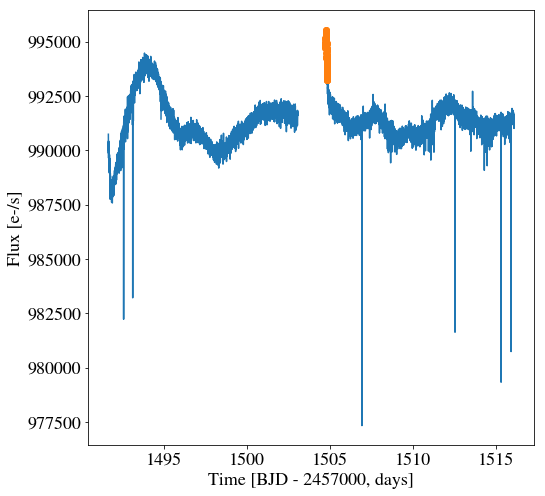

In [27]:
TIC = df[mask].iloc[3]['TIC']
TIC_str = str(int(TIC)).zfill(16)
file = 'tess2019006130736-s0007-'+TIC_str+'-0131-s_lc.fits'

print(file)

tstart = df[mask][df['TIC'] == TIC]['t0'].values
tstop = df[mask][df['TIC'] == TIC]['t1'].values

with fits.open(path+file, mode='readonly') as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
    pdcsap_flux_error = hdulist[1].data['PDCSAP_FLUX_ERR']

fig, axes = plt.subplots(figsize=(8,8))
axes.plot(tess_bjds, pdcsap_fluxes)

for idx in range(len((tstart))):
    indices = np.where((tess_bjds >= tstart[idx]) & (tess_bjds <= tstop[idx]))[0]
    axes.plot(tess_bjds[indices], pdcsap_fluxes[indices], 'o')

axes.set_xlabel('Time [BJD - 2457000, days]')
axes.set_ylabel('Flux [e-/s]')

tess2019006130736-s0007-0000000059764377-0131-s_lc.fits


/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater_equal
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less_equal


Text(0, 0.5, 'Flux [e-/s]')

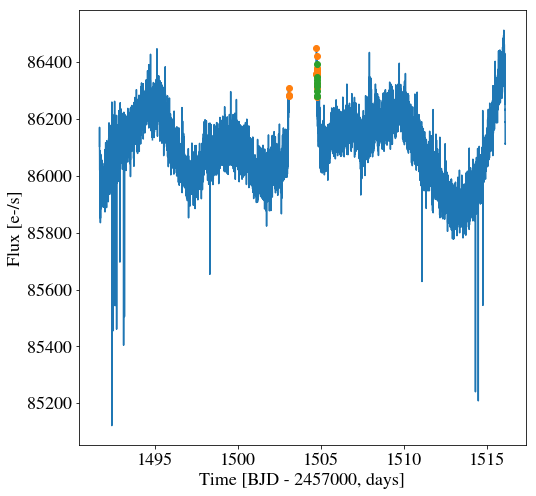

In [28]:
TIC = df[mask].iloc[4]['TIC']
TIC_str = str(int(TIC)).zfill(16)
file = 'tess2019006130736-s0007-'+TIC_str+'-0131-s_lc.fits'

print(file)

tstart = df[mask][df['TIC'] == TIC]['t0'].values
tstop = df[mask][df['TIC'] == TIC]['t1'].values

with fits.open(path+file, mode='readonly') as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
    pdcsap_flux_error = hdulist[1].data['PDCSAP_FLUX_ERR']

fig, axes = plt.subplots(figsize=(8,8))
axes.plot(tess_bjds, pdcsap_fluxes)

for idx in range(len((tstart))):
    indices = np.where((tess_bjds >= tstart[idx]) & (tess_bjds <= tstop[idx]))[0]
    axes.plot(tess_bjds[indices], pdcsap_fluxes[indices], 'o')

axes.set_xlabel('Time [BJD - 2457000, days]')
axes.set_ylabel('Flux [e-/s]')

In [29]:
peakDivMed = df['peak']/df['med']
numBelowMed = len(peakDivMed[peakDivMed < 1])
print('There are ' + str(numBelowMed) + ' flare detections in which the peak flux is smaller than the median.')

There are 45 flare detections in which the peak flux is smaller than the median.


There is a horizontal line of points in plot 3 that falls between 186.5 and 187 on the y axis and 1506 to 1516 on the x axis. These flares all come from TIC 412345587. Lets see whats going on with this light curve.

In [30]:
mask = (df['med'] > 186.5) & (df['med'] < 187) & (df['t0'] > 1505) & (df['t0'] < 1516)
df[mask]

,Unnamed: 0,TIC,t0,t1,med,peak
1761,18176.0,412345587,1506.986140,1506.994473,186.792755,830.919373
1762,18176.0,412345587,1507.508359,1507.525025,186.792755,858.020142
1763,18176.0,412345587,1508.033354,1508.050021,186.792755,873.188660
1764,18176.0,412345587,1508.561127,1508.573627,186.792755,868.946411
1765,18176.0,412345587,1509.083344,1509.101399,186.792755,900.406799
1766,18176.0,412345587,1509.611116,1509.631949,186.792755,906.895935
1767,18176.0,412345587,1510.138887,1510.155554,186.792755,879.683411
1768,18176.0,412345587,1510.662491,1510.680547,186.792755,918.966248
1769,18176.0,412345587,1511.187484,1511.209706,186.792755,934.388000
1770,18176.0,412345587,1511.718031,1511.734697,186.792755,904.643433


Text(0, 0.5, 'Flux [e-/s]')

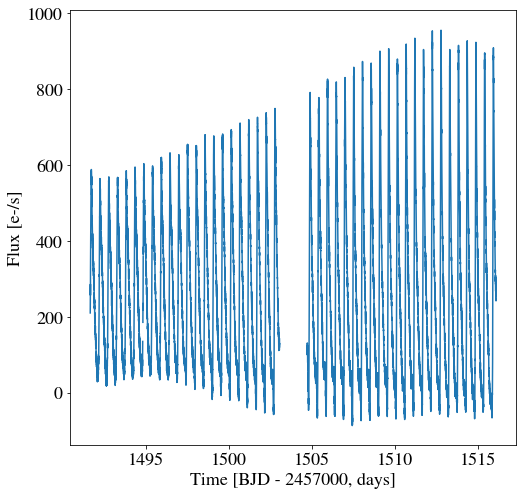

In [31]:
file = 'tess2019006130736-s0007-0000000412345587-0131-s_lc.fits'

with fits.open(path+file, mode='readonly') as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
    pdcsap_flux_error = hdulist[1].data['PDCSAP_FLUX_ERR']

fig, axes = plt.subplots(figsize=(8,8))
axes.plot(tess_bjds, pdcsap_fluxes)
axes.set_xlabel('Time [BJD - 2457000, days]')
axes.set_ylabel('Flux [e-/s]')

Lets look at the flare detections in which the peak is smaller than the median

In [32]:
mask = df['peak'] < df['med']
df[mask]

,Unnamed: 0,TIC,t0,t1,med,peak
66,460.0,38827910,1510.639800,1510.653688,2.056437e+04,2.048149e+04
88,729.0,262609754,1493.796260,1493.801816,8.369883e+03,8.282078e+03
108,1036.0,152076382,1504.709047,1504.720158,3.432531e+04,3.414995e+04
175,1802.0,279614617,1498.364810,1498.485644,3.488734e+04,3.453588e+04
181,1871.0,124249007,1501.024048,1501.029603,4.416496e+04,4.415664e+04
276,2987.0,64962689,1502.994059,1503.002392,2.754500e+04,2.747088e+04
277,2987.0,64962689,1503.021837,1503.041281,2.754500e+04,2.750885e+04
358,3515.0,264313563,1504.801118,1504.806673,9.974536e+05,9.974141e+05
487,4514.0,255590987,1510.522370,1510.529314,1.367759e+04,1.358360e+04
616,6194.0,285413207,1504.707774,1504.728607,1.713377e+04,1.713046e+04


tess2019006130736-s0007-0000000038827910-0131-s_lc.fits


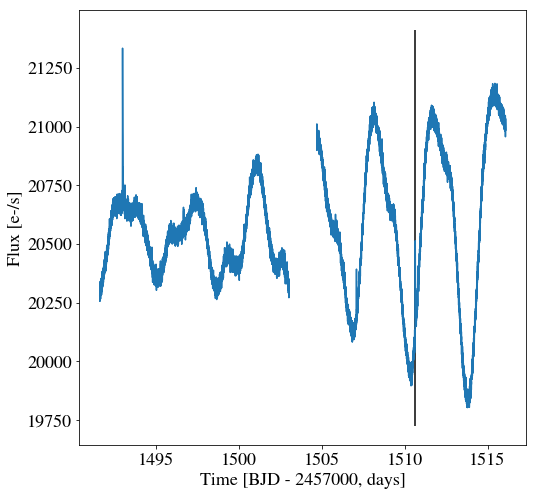

In [33]:
TIC = df[mask].iloc[0]['TIC']
TIC_str = str(int(TIC)).zfill(16)
file = 'tess2019006130736-s0007-'+TIC_str+'-0131-s_lc.fits'

print(file)

with fits.open(path+file, mode='readonly') as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
    pdcsap_flux_error = hdulist[1].data['PDCSAP_FLUX_ERR']

fig, axes = plt.subplots(figsize=(8,8))
axes.plot(tess_bjds, pdcsap_fluxes)
axes.set_xlabel('Time [BJD - 2457000, days]')
axes.set_ylabel('Flux [e-/s]')
ymin, ymax = axes.get_ylim()
axes.vlines(df[mask].iloc[0]['t0'], ymin, ymax)

tess2019006130736-s0007-0000000262609754-0131-s_lc.fits


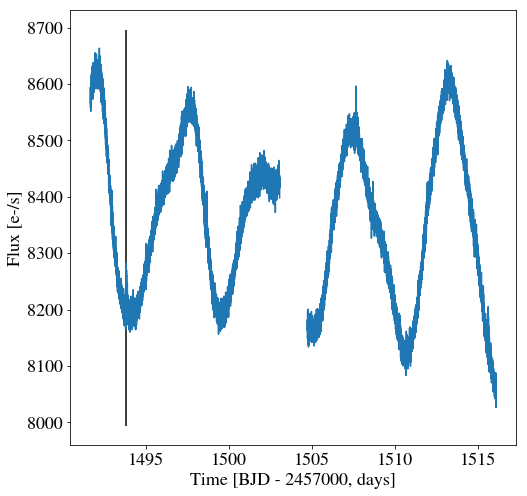

In [34]:
TIC = df[mask].iloc[1]['TIC']
TIC_str = str(int(TIC)).zfill(16)
file = 'tess2019006130736-s0007-'+TIC_str+'-0131-s_lc.fits'

print(file)

with fits.open(path+file, mode='readonly') as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
    pdcsap_flux_error = hdulist[1].data['PDCSAP_FLUX_ERR']

fig, axes = plt.subplots(figsize=(8,8))
axes.plot(tess_bjds, pdcsap_fluxes)
axes.set_xlabel('Time [BJD - 2457000, days]')
axes.set_ylabel('Flux [e-/s]')
ymin, ymax = axes.get_ylim()
axes.vlines(df[mask].iloc[1]['t0'], ymin, ymax)

tess2019006130736-s0007-0000000152076382-0131-s_lc.fits


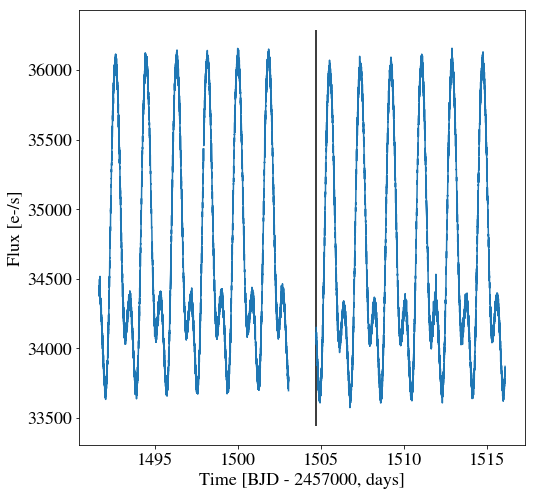

In [35]:
TIC = df[mask].iloc[2]['TIC']
TIC_str = str(int(TIC)).zfill(16)
file = 'tess2019006130736-s0007-'+TIC_str+'-0131-s_lc.fits'

print(file)

with fits.open(path+file, mode='readonly') as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
    pdcsap_flux_error = hdulist[1].data['PDCSAP_FLUX_ERR']

fig, axes = plt.subplots(figsize=(8,8))
axes.plot(tess_bjds, pdcsap_fluxes)
axes.set_xlabel('Time [BJD - 2457000, days]')
axes.set_ylabel('Flux [e-/s]')
ymin, ymax = axes.get_ylim()
axes.vlines(df[mask].iloc[2]['t0'], ymin, ymax)

In [36]:
# Now look at flare stats from iterative spline fitting
df = pd.read_csv('7.spline_flare_out.csv')
print(str(len(df)) + ' flare detections')

825 flare detections


In [37]:
df

,Unnamed: 0,TIC,t0,t1,med,peak
0,29.0,55498515,1511.816146,1511.825868,3.607560e+03,3.659755e+03
1,49.0,220589669,1510.133157,1510.140102,2.431203e+03,3.011542e+03
2,49.0,220589669,1511.892852,1511.903963,2.431203e+03,2.915267e+03
3,63.0,19941715,1504.728326,1504.733882,9.912838e+05,9.955219e+05
4,103.0,277104322,1494.137226,1494.142781,2.749785e+03,3.370589e+03
5,150.0,19075500,1511.922986,1511.941041,6.025255e+02,8.593370e+02
6,174.0,177329671,1491.638149,1491.645093,1.738934e+06,1.742298e+06
7,175.0,358544904,1494.640186,1494.649908,4.446903e+02,5.186663e+02
8,177.0,16159561,1507.001303,1507.011025,2.537872e+02,3.844013e+02
9,180.0,453002670,1491.863356,1491.874467,1.460455e+03,3.155116e+03


Text(0, 0.5, 'Peak/Median Flux')

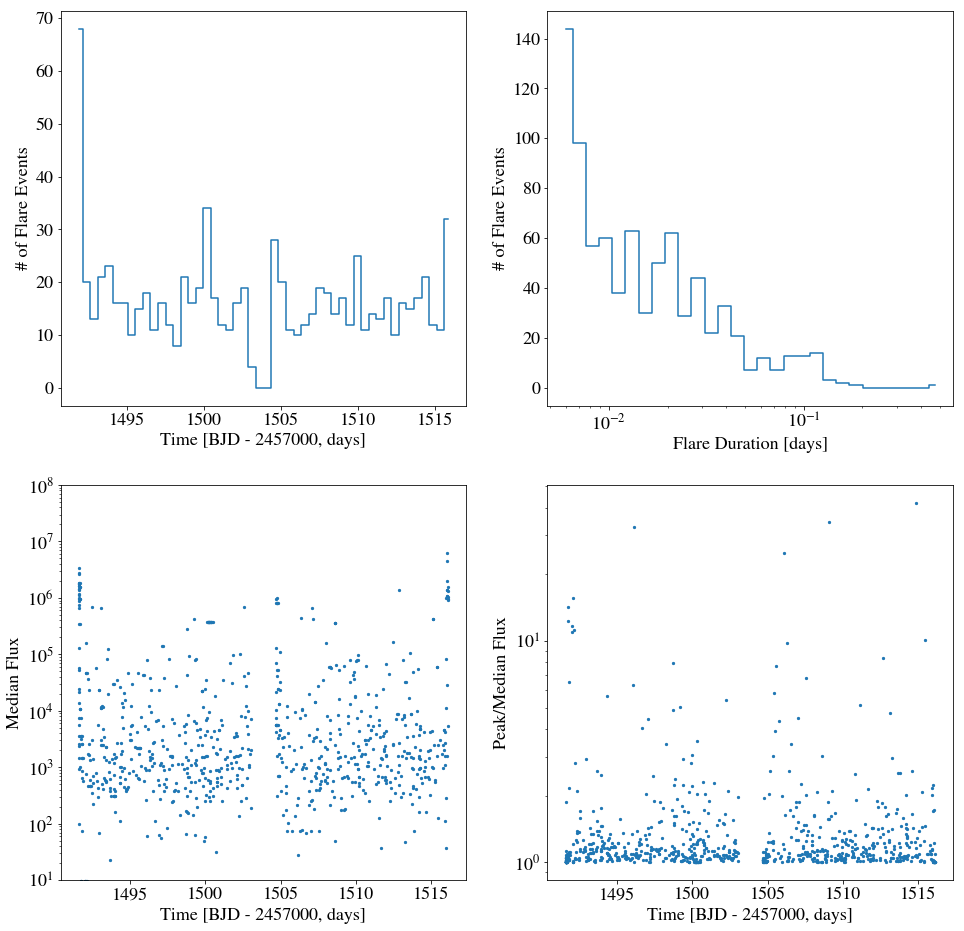

In [38]:
fig, axes = plt.subplots(figsize=(16,16), nrows=2, ncols=2)

hist, bins = np.histogram(df['t0'], bins=50)
bins = 0.5*(bins[1:] + bins[:-1])
axes[0][0].plot(bins, hist, linestyle='steps-mid')
axes[0][0].set_xlabel('Time [BJD - 2457000, days]')
axes[0][0].set_ylabel('# of Flare Events')

duration = df['t1'] - df['t0']
bins = np.logspace(np.log10(np.min(duration)), np.log10(np.max(duration)), num=30)
hist, bins = np.histogram(duration, bins=bins)
bins = 0.5*(bins[1:] + bins[:-1])
axes[0][1].semilogx(bins, hist, linestyle='steps-mid')
axes[0][1].set_xlabel('Flare Duration [days]')
axes[0][1].set_ylabel('# of Flare Events')

bins = 0.5*(bins[1:] + bins[:-1])
axes[1][0].scatter(df['t0'], df['med'], s=5)
axes[1][0].set_yscale('log')
axes[1][0].set_ylim(10, 1e8)
axes[1][0].set_xlabel('Time [BJD - 2457000, days]')
axes[1][0].set_ylabel('Median Flux')

bins = 0.5*(bins[1:] + bins[:-1])
axes[1][1].scatter(df['t0'], df['peak']/df['med'], s=5)
axes[1][1].set_yscale('log')
axes[1][1].set_xlabel('Time [BJD - 2457000, days]')
axes[1][1].set_ylabel('Peak/Median Flux')

In [39]:
peakDivMed = df['peak']/df['med']
numBelowMed = len(peakDivMed[peakDivMed < 1])
print('There are ' + str(numBelowMed) + ' flare detections in which the peak flux is smaller than the median.')

There are 0 flare detections in which the peak flux is smaller than the median.


In this case, it looks like there are some anomalous detections at the very edges of the time window. The previous method, in which the rolling median is subtracted from the lightcurve dont catch these because the rolling median is undefined close to the edges of the lightcurve and the data points are thrown out when we look for flares.

(1491.6, 1491.65)

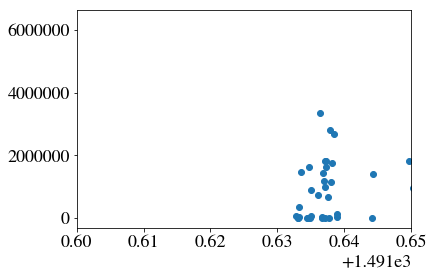

In [40]:
plt.scatter(df['t0'], df['med'])
plt.xlim(1491.6, 1491.65)

In [41]:
# Lots of flare detections around the break in the data
mask = df['t0'] < 1491.65
df[mask]

,Unnamed: 0,TIC,t0,t1,med,peak
6,174.0,177329671,1491.638149,1491.645093,1.738934e+06,1.742298e+06
16,295.0,65133819,1491.636754,1491.646476,1.435791e+06,1.438712e+06
45,755.0,219206120,1491.634515,1491.678960,5.600645e+03,5.883362e+03
74,1447.0,293752076,1491.637075,1491.673188,1.480001e+03,1.570547e+03
154,3372.0,55659358,1491.633091,1491.663646,3.616936e+03,3.769325e+03
172,3618.0,64203640,1491.637056,1491.650945,9.858369e+05,9.906382e+05
173,3679.0,55649865,1491.633129,1491.640074,2.611226e+03,2.679907e+03
268,5909.0,238562738,1491.634949,1491.641893,8.956905e+05,8.972633e+05
303,6896.0,293741822,1491.637301,1491.647024,1.802920e+06,1.806221e+06
319,7138.0,232032625,1491.635049,1491.657272,5.334677e+04,5.373626e+04


tess2019006130736-s0007-0000000177329671-0131-s_lc.fits


/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater_equal
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less_equal


Text(0, 0.5, 'Flux [e-/s]')

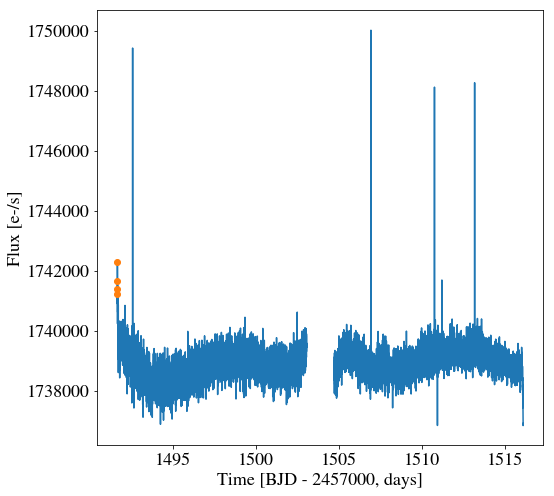

In [42]:
TIC = df[mask].iloc[0]['TIC']
TIC_str = str(int(TIC)).zfill(16)
file = 'tess2019006130736-s0007-'+TIC_str+'-0131-s_lc.fits'

print(file)

tstart = df[mask][df['TIC'] == TIC]['t0'].values
tstop = df[mask][df['TIC'] == TIC]['t1'].values

with fits.open(path+file, mode='readonly') as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
    pdcsap_flux_error = hdulist[1].data['PDCSAP_FLUX_ERR']

fig, axes = plt.subplots(figsize=(8,8))
axes.plot(tess_bjds, pdcsap_fluxes)

for idx in range(len((tstart))):
    indices = np.where((tess_bjds >= tstart[idx]) & (tess_bjds <= tstop[idx]))[0]
    axes.plot(tess_bjds[indices], pdcsap_fluxes[indices], 'o')

axes.set_xlabel('Time [BJD - 2457000, days]')
axes.set_ylabel('Flux [e-/s]')

tess2019006130736-s0007-0000000065133819-0131-s_lc.fits


/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater_equal
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less_equal


Text(0, 0.5, 'Flux [e-/s]')

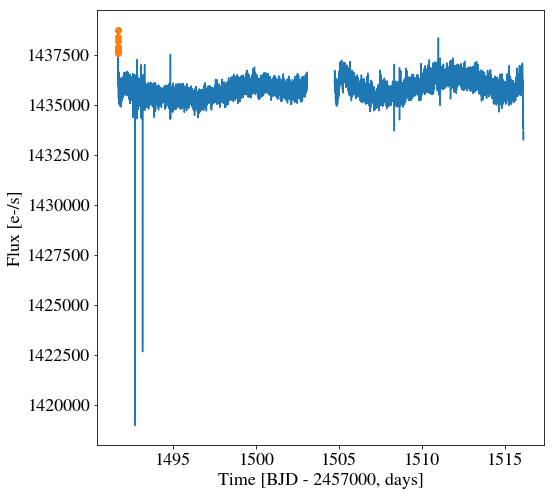

In [43]:
TIC = df[mask].iloc[1]['TIC']
TIC_str = str(int(TIC)).zfill(16)
file = 'tess2019006130736-s0007-'+TIC_str+'-0131-s_lc.fits'

print(file)

tstart = df[mask][df['TIC'] == TIC]['t0'].values
tstop = df[mask][df['TIC'] == TIC]['t1'].values

with fits.open(path+file, mode='readonly') as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
    pdcsap_flux_error = hdulist[1].data['PDCSAP_FLUX_ERR']

fig, axes = plt.subplots(figsize=(8,8))
axes.plot(tess_bjds, pdcsap_fluxes)

for idx in range(len((tstart))):
    indices = np.where((tess_bjds >= tstart[idx]) & (tess_bjds <= tstop[idx]))[0]
    axes.plot(tess_bjds[indices], pdcsap_fluxes[indices], 'o')

axes.set_xlabel('Time [BJD - 2457000, days]')
axes.set_ylabel('Flux [e-/s]')

tess2019006130736-s0007-0000000219206120-0131-s_lc.fits


/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater_equal
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less_equal


Text(0, 0.5, 'Flux [e-/s]')

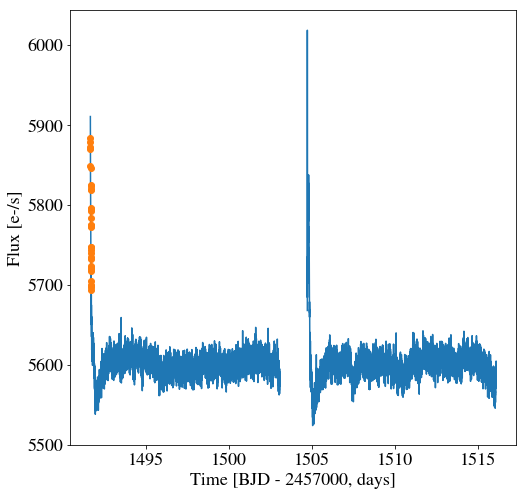

In [44]:
TIC = df[mask].iloc[2]['TIC']
TIC_str = str(int(TIC)).zfill(16)
file = 'tess2019006130736-s0007-'+TIC_str+'-0131-s_lc.fits'

print(file)

tstart = df[mask][df['TIC'] == TIC]['t0'].values
tstop = df[mask][df['TIC'] == TIC]['t1'].values

with fits.open(path+file, mode='readonly') as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
    pdcsap_flux_error = hdulist[1].data['PDCSAP_FLUX_ERR']

fig, axes = plt.subplots(figsize=(8,8))
axes.plot(tess_bjds, pdcsap_fluxes)

for idx in range(len((tstart))):
    indices = np.where((tess_bjds >= tstart[idx]) & (tess_bjds <= tstop[idx]))[0]
    axes.plot(tess_bjds[indices], pdcsap_fluxes[indices], 'o')

axes.set_xlabel('Time [BJD - 2457000, days]')
axes.set_ylabel('Flux [e-/s]')

In [3]:
# Now look at flare stats from iterative spline fitting + cutting edges off of data
df = pd.read_csv('7.splinetrim_flare_out.csv')
print(str(len(df)) + ' flare detections')

762 flare detections


In [7]:
df

,Unnamed: 0,TIC,t0,t1,med,peak
0,29.0,55498515,1511.816146,1511.825868,3607.550049,3659.755371
1,49.0,220589669,1510.133157,1510.140102,2431.072998,3011.541504
2,49.0,220589669,1511.892852,1511.903963,2431.072998,2915.266846
3,63.0,19941715,1504.728326,1504.733882,991284.812500,995521.875000
4,103.0,277104322,1494.137226,1494.142781,2750.559082,3370.588623
5,150.0,19075500,1511.922986,1511.941041,602.525085,859.337036
6,175.0,358544904,1494.640186,1494.649908,444.694763,518.666260
7,177.0,16159561,1507.001303,1507.011025,253.775894,384.401337
8,180.0,453002670,1491.863356,1491.874467,1460.506104,3155.115723
9,180.0,453002670,1507.573326,1507.601104,1460.506104,9960.132812


Text(0, 0.5, 'Peak/Median Flux')

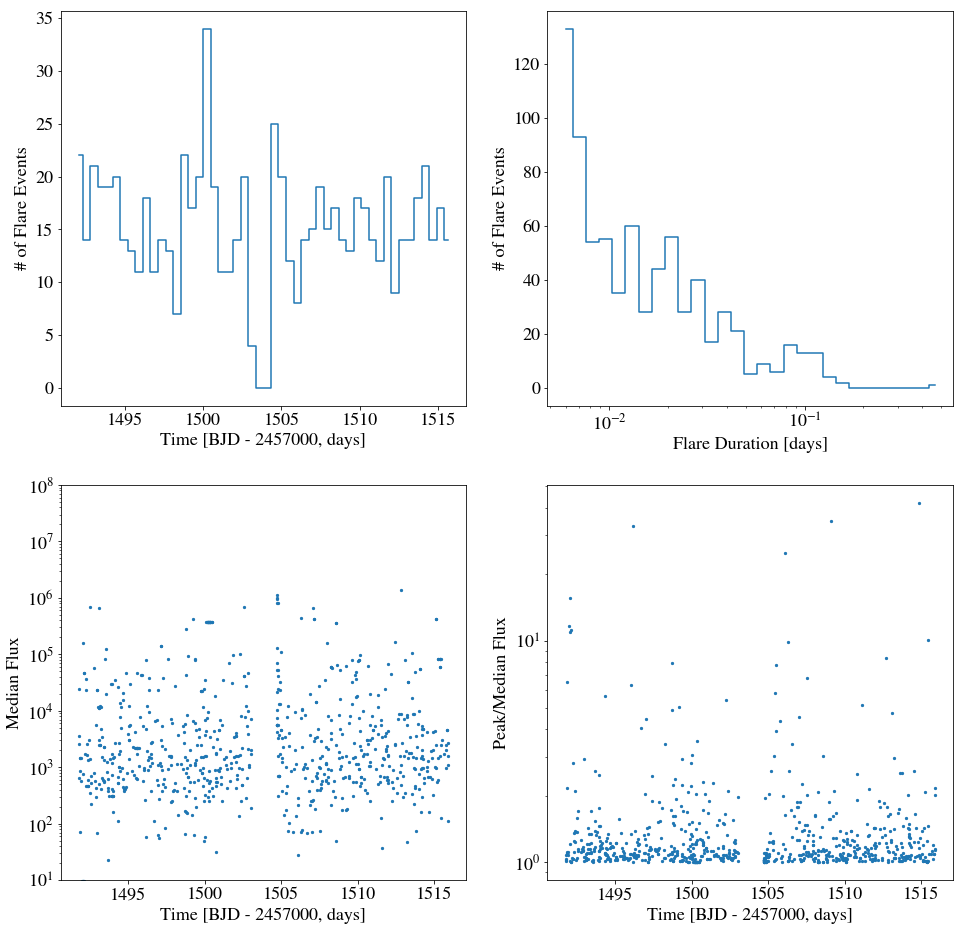

In [47]:
fig, axes = plt.subplots(figsize=(16,16), nrows=2, ncols=2)

hist, bins = np.histogram(df['t0'], bins=50)
bins = 0.5*(bins[1:] + bins[:-1])
axes[0][0].plot(bins, hist, linestyle='steps-mid')
axes[0][0].set_xlabel('Time [BJD - 2457000, days]')
axes[0][0].set_ylabel('# of Flare Events')

duration = df['t1'] - df['t0']
bins = np.logspace(np.log10(np.min(duration)), np.log10(np.max(duration)), num=30)
hist, bins = np.histogram(duration, bins=bins)
bins = 0.5*(bins[1:] + bins[:-1])
axes[0][1].semilogx(bins, hist, linestyle='steps-mid')
axes[0][1].set_xlabel('Flare Duration [days]')
axes[0][1].set_ylabel('# of Flare Events')

bins = 0.5*(bins[1:] + bins[:-1])
axes[1][0].scatter(df['t0'], df['med'], s=5)
axes[1][0].set_yscale('log')
axes[1][0].set_ylim(10, 1e8)
axes[1][0].set_xlabel('Time [BJD - 2457000, days]')
axes[1][0].set_ylabel('Median Flux')

bins = 0.5*(bins[1:] + bins[:-1])
axes[1][1].scatter(df['t0'], df['peak']/df['med'], s=5)
axes[1][1].set_yscale('log')
axes[1][1].set_xlabel('Time [BJD - 2457000, days]')
axes[1][1].set_ylabel('Peak/Median Flux')

In [2]:
# Now look at flare stats from iterative gaussian process fitting
df = pd.read_csv('7.gauss_flare_out.csv')
print(str(len(df)) + ' flare detections')

727 flare detections


In [3]:
df

,Unnamed: 0,TIC,t0,t1,med,peak,ed
0,29.0,55498515,1511.816146,1511.825868,3607.550049,3659.755371,35.486053
1,49.0,220589669,1510.133157,1510.140102,2431.072998,3011.541504,18.595867
2,49.0,220589669,1511.892852,1511.903963,2431.072998,2915.266846,29.223078
3,63.0,19941715,1504.728326,1504.733882,991284.812500,995521.875000,5529.966482
4,103.0,277104322,1494.137226,1494.142781,2750.559082,3370.588623,18.609485
5,150.0,19075500,1511.922986,1511.941041,602.525085,859.337036,12.929694
6,175.0,358544904,1494.640186,1494.649908,444.694763,518.666260,4.807366
7,177.0,16159561,1507.001303,1507.011025,253.775894,384.401337,3.186095
8,180.0,453002670,1491.863356,1491.874467,1460.506165,3155.115723,29.540189
9,180.0,453002670,1507.573326,1507.601104,1460.506165,9960.132812,98.306800


Text(0, 0.5, 'Peak/Median Flux')

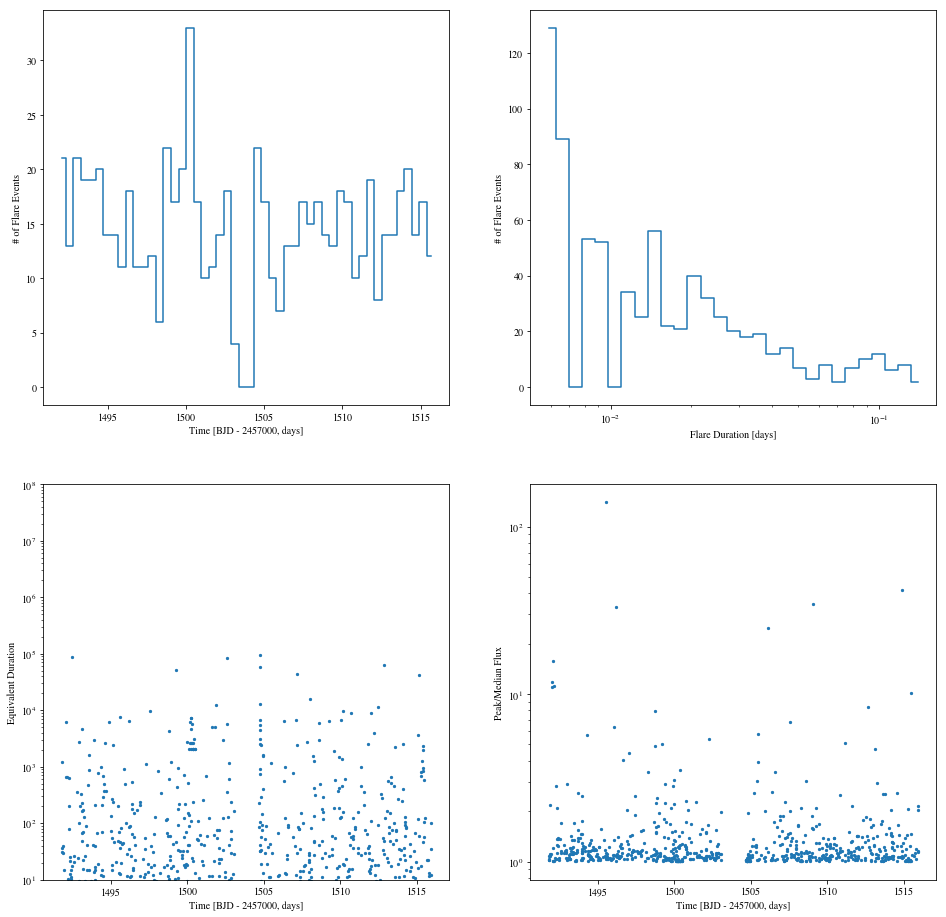

In [4]:
fig, axes = plt.subplots(figsize=(16,16), nrows=2, ncols=2)

hist, bins = np.histogram(df['t0'], bins=50)
bins = 0.5*(bins[1:] + bins[:-1])
axes[0][0].plot(bins, hist, linestyle='steps-mid')
axes[0][0].set_xlabel('Time [BJD - 2457000, days]')
axes[0][0].set_ylabel('# of Flare Events')

duration = df['t1'] - df['t0']
bins = np.logspace(np.log10(np.min(duration)), np.log10(np.max(duration)), num=30)
hist, bins = np.histogram(duration, bins=bins)
bins = 0.5*(bins[1:] + bins[:-1])
axes[0][1].semilogx(bins, hist, linestyle='steps-mid')
axes[0][1].set_xlabel('Flare Duration [days]')
axes[0][1].set_ylabel('# of Flare Events')

bins = 0.5*(bins[1:] + bins[:-1])
axes[1][0].scatter(df['t0'], df['ed'], s=5)
axes[1][0].set_yscale('log')
axes[1][0].set_ylim(10, 1e8)
axes[1][0].set_xlabel('Time [BJD - 2457000, days]')
axes[1][0].set_ylabel('Equivalent Duration')

bins = 0.5*(bins[1:] + bins[:-1])
axes[1][1].scatter(df['t0'], df['peak']/df['med'], s=5)
axes[1][1].set_yscale('log')
axes[1][1].set_xlabel('Time [BJD - 2457000, days]')
axes[1][1].set_ylabel('Peak/Median Flux')

tess2019006130736-s0007-0000000004786838-0131-s_lc.fits


/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater_equal
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less_equal


(1497, 1497.5)

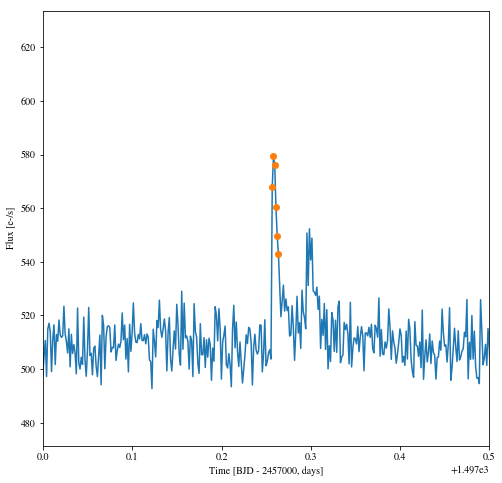

In [36]:
TIC = df.iloc[0]['TIC']
TIC_str = str(int(TIC)).zfill(16)
file = 'tess2019006130736-s0007-'+TIC_str+'-0131-s_lc.fits'

print(file)

tstart = df[df['TIC'] == TIC]['t0'].values
tstop = df[df['TIC'] == TIC]['t1'].values

with fits.open(path+file, mode='readonly') as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
    pdcsap_flux_error = hdulist[1].data['PDCSAP_FLUX_ERR']

fig, axes = plt.subplots(figsize=(8,8))
axes.plot(tess_bjds, pdcsap_fluxes)

for idx in range(len((tstart))):
    indices = np.where((tess_bjds >= tstart[idx]) & (tess_bjds <= tstop[idx]))[0]
    axes.plot(tess_bjds[indices], pdcsap_fluxes[indices], 'o')

axes.set_xlabel('Time [BJD - 2457000, days]')
axes.set_ylabel('Flux [e-/s]')
axes.set_xlim(1497, 1497.5)

tess2019006130736-s0007-0000000005916713-0131-s_lc.fits


/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater_equal
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less_equal


(1512.7, 1513.1)

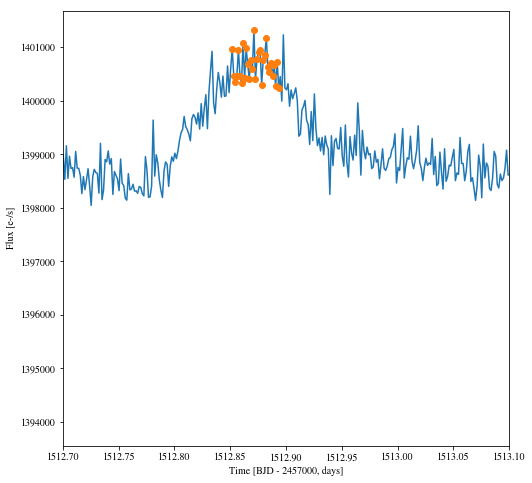

In [37]:
TIC = df.iloc[2]['TIC']
TIC_str = str(int(TIC)).zfill(16)
file = 'tess2019006130736-s0007-'+TIC_str+'-0131-s_lc.fits'

print(file)

tstart = df[df['TIC'] == TIC]['t0'].values
tstop = df[df['TIC'] == TIC]['t1'].values

with fits.open(path+file, mode='readonly') as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
    pdcsap_flux_error = hdulist[1].data['PDCSAP_FLUX_ERR']

fig, axes = plt.subplots(figsize=(8,8))
axes.plot(tess_bjds, pdcsap_fluxes)

for idx in range(len((tstart))):
    indices = np.where((tess_bjds >= tstart[idx]) & (tess_bjds <= tstop[idx]))[0]
    axes.plot(tess_bjds[indices], pdcsap_fluxes[indices], 'o')

axes.set_xlabel('Time [BJD - 2457000, days]')
axes.set_ylabel('Flux [e-/s]')
axes.set_xlim(1512.7, 1513.1)

tess2019006130736-s0007-0000000014768025-0131-s_lc.fits


/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater_equal
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less_equal


(1498.7, 1499.1)

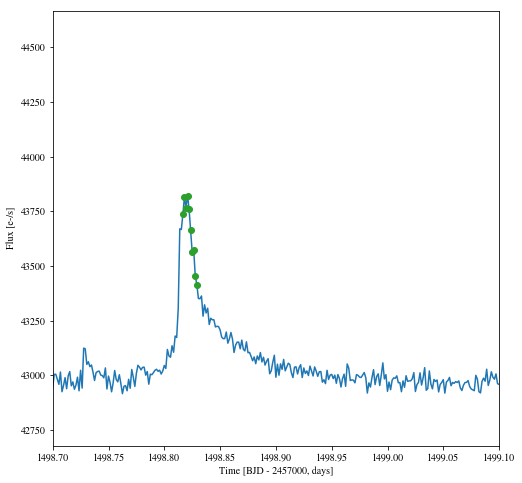

In [38]:
TIC = df.iloc[7]['TIC']
TIC_str = str(int(TIC)).zfill(16)
file = 'tess2019006130736-s0007-'+TIC_str+'-0131-s_lc.fits'

print(file)

tstart = df[df['TIC'] == TIC]['t0'].values
tstop = df[df['TIC'] == TIC]['t1'].values

with fits.open(path+file, mode='readonly') as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
    pdcsap_flux_error = hdulist[1].data['PDCSAP_FLUX_ERR']

fig, axes = plt.subplots(figsize=(8,8))
axes.plot(tess_bjds, pdcsap_fluxes)

for idx in range(len((tstart))):
    indices = np.where((tess_bjds >= tstart[idx]) & (tess_bjds <= tstop[idx]))[0]
    axes.plot(tess_bjds[indices], pdcsap_fluxes[indices], 'o')

axes.set_xlabel('Time [BJD - 2457000, days]')
axes.set_ylabel('Flux [e-/s]')
axes.set_xlim(1498.7, 1499.1)